In [2]:
import sys
!{sys.executable} -m pip install pandas numpy scikit-learn matplotlib tensorflow mdatagen


  Using cached tensorflow-2.20.0-cp313-cp313-win_amd64.whl.metadata (4.6 kB)
  Using cached mdatagen-0.2.0-py3-none-any.whl.metadata (9.0 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.9.23-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.7.0-py3-none-any.whl.metadata (1.5 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-6.33.1-cp310-abi3-win_amd64.whl.metadata (593 bytes)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached termcolor-3.2.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached wra

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [12]:
# generate_missing.py
import os
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

# mdatagen imports (univariate and multivariate examples exist)
from mdatagen.univariate.uMCAR import uMCAR
from mdatagen.univariate.uMAR import uMAR
from mdatagen.univariate.uMNAR import uMNAR  # si disponible (lib fournit MNAR univariate)


OUTDIR = "generated_missing"
os.makedirs(OUTDIR, exist_ok=True)

diab = load_diabetes()
X = pd.DataFrame(diab.data, columns=diab.feature_names)
y = diab.target  


In [13]:
rates = [10, 20, 30, 50, 70] 
np.random.seed(42)

def attach_target(df_missing):
    return pd.concat([df_missing.reset_index(drop=True),
                      pd.Series(y, name="target")], axis=1)

def save_and_report(df_missing, name):
    path = os.path.join(OUTDIR, name + ".csv")
    df_missing.to_csv(path, index=False)
    print(f"Saved {path}")
    print(df_missing.isna().sum(), "\n")



In [5]:
# 1) MCAR - utiliser uMCAR (univariate example)
for rate in rates:
    gen = uMCAR(X=X.copy(), y=y, missing_rate=rate, x_miss=None)  # x_miss=None -> choisit colonne aléatoire si possible
    df_missing = gen.random()  
    # si le générateur retourne seulement X, concat target
    if "target" not in df_missing.columns:
        df_missing = pd.concat([df_missing, y.reset_index(drop=True)], axis=1)
    save_and_report(df_missing, f"data_MCAR_{rate}")

Saved generated_missing\data_MCAR_10.csv
age        0
sex        0
bmi        0
bp         0
s1         0
s2         0
s3         0
s4         0
s5         0
s6        44
target     0
dtype: int64 

Saved generated_missing\data_MCAR_20.csv
age        0
sex        0
bmi        0
bp         0
s1         0
s2         0
s3        88
s4         0
s5         0
s6         0
target     0
dtype: int64 

Saved generated_missing\data_MCAR_30.csv
age         0
sex         0
bmi         0
bp          0
s1          0
s2          0
s3          0
s4          0
s5          0
s6        133
target      0
dtype: int64 

Saved generated_missing\data_MCAR_50.csv
age         0
sex         0
bmi         0
bp          0
s1          0
s2          0
s3          0
s4        221
s5          0
s6          0
target      0
dtype: int64 

Saved generated_missing\data_MCAR_70.csv
age         0
sex       309
bmi         0
bp          0
s1          0
s2          0
s3          0
s4          0
s5          0
s6          0
t

In [14]:
# 2) MAR - exemple univariate: choisir colonne dépendante (x_miss) et variable d'observation (x_obs)
# On prend la première colonne comme x_miss et une autre variable aléatoire comme x_obs
for rate in rates:
    x_miss = X.columns[0]
    x_obs = X.columns[2] if len(X.columns) > 2 else X.columns[1]
    gen = uMAR(X=X.copy(), y=y, missing_rate=rate, x_miss=x_miss, x_obs=x_obs)
    df_missing = gen.rank()  
    if "target" not in df_missing.columns:
        df_missing = pd.concat([df_missing, y.reset_index(drop=True)], axis=1)
    save_and_report(df_missing, f"data_MAR_{rate}")



Saved generated_missing\data_MAR_10.csv
age       44
sex        0
bmi        0
bp         0
s1         0
s2         0
s3         0
s4         0
s5         0
s6         0
target     0
dtype: int64 

Saved generated_missing\data_MAR_20.csv
age       88
sex        0
bmi        0
bp         0
s1         0
s2         0
s3         0
s4         0
s5         0
s6         0
target     0
dtype: int64 

Saved generated_missing\data_MAR_30.csv
age       133
sex         0
bmi         0
bp          0
s1          0
s2          0
s3          0
s4          0
s5          0
s6          0
target      0
dtype: int64 

Saved generated_missing\data_MAR_50.csv
age       221
sex         0
bmi         0
bp          0
s1          0
s2          0
s3          0
s4          0
s5          0
s6          0
target      0
dtype: int64 

Saved generated_missing\data_MAR_70.csv
age       309
sex         0
bmi         0
bp          0
s1          0
s2          0
s3          0
s4          0
s5          0
s6          0
target

In [7]:
for rate in rates:
    try:
        gen = uMNAR(X=X.copy(), y=y, missing_rate=rate, x_miss=X.columns[0])
        df_missing = gen.random()
    except Exception as e:
        print("MNAR failed, fallback:", e)
        df_missing = X.copy()
        col = X.columns[0]
        probs = (df_missing[col] - df_missing[col].min()) / (df_missing[col].max() - df_missing[col].min())
        mask = np.random.rand(len(df_missing)) < (probs * (rate/100))
        df_missing.loc[mask, col] = np.nan

    if "target" not in df_missing.columns:
        df_missing = attach_target(df_missing)

    save_and_report(df_missing, f"data_MNAR_{rate}")

MNAR failed, fallback: 'uMNAR' object has no attribute 'random'
Saved generated_missing\data_MNAR_10.csv
age       22
sex        0
bmi        0
bp         0
s1         0
s2         0
s3         0
s4         0
s5         0
s6         0
target     0
dtype: int64 

MNAR failed, fallback: 'uMNAR' object has no attribute 'random'
Saved generated_missing\data_MNAR_20.csv
age       38
sex        0
bmi        0
bp         0
s1         0
s2         0
s3         0
s4         0
s5         0
s6         0
target     0
dtype: int64 

MNAR failed, fallback: 'uMNAR' object has no attribute 'random'
Saved generated_missing\data_MNAR_30.csv
age       62
sex        0
bmi        0
bp         0
s1         0
s2         0
s3         0
s4         0
s5         0
s6         0
target     0
dtype: int64 

MNAR failed, fallback: 'uMNAR' object has no attribute 'random'
Saved generated_missing\data_MNAR_50.csv
age       94
sex        0
bmi        0
bp         0
s1         0
s2         0
s3         0
s4         0
s5

In [15]:
print("Génération terminée. Fichiers dans:", OUTDIR)

Génération terminée. Fichiers dans: generated_missing


In [16]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

DATA_DIR = "generated_missing"

# Méthodes d'imputation à tester
imputers = {
    "drop": "drop",   # handled manually
    "mean": SimpleImputer(strategy="mean"),
    "median": SimpleImputer(strategy="median"),
    "knn": KNNImputer(n_neighbors=5),
    "mice": IterativeImputer(random_state=42)
}


# Fonction d’imputation sur un DataFrame
def apply_imputation(df, method_name, imputer):

    # Séparer X et y (target)
    X = df.drop(columns=["target"])
    y = df["target"]

    if method_name == "drop":
        # suppression uniquement des lignes contenant des NaN
        df_clean = df.dropna()
        return df_clean

    # Sinon imputation
    X_imputed = pd.DataFrame(
        imputer.fit_transform(X),
        columns=X.columns
    )

    df_imputed = pd.concat([X_imputed, y.reset_index(drop=True)], axis=1)
    return df_imputed




In [10]:

# Charger tous les jeux générés et appliquer les imputations
results = {}

for filename in os.listdir(DATA_DIR):
    if filename.endswith(".csv"):
        path = os.path.join(DATA_DIR, filename)
        df = pd.read_csv(path)

        mechanism = filename.split("_")[1]     # MCAR / MAR / MNAR
        rate = filename.split("_")[2].split(".")[0]   # 10/20/30...

        print(f"\nProcessing {filename} ({mechanism}, {rate}%)")

        results[(mechanism, rate)] = {}

        for method_name, imputer in imputers.items():
            print(f"  - Imputation: {method_name}")

            df_imputed = apply_imputation(df, method_name, imputer)

            # on sauvegarde pour utilisation dans l’étape 3
            out_dir = "imputed_data"
            os.makedirs(out_dir, exist_ok=True)

            out_file = f"{mechanism}_{rate}_{method_name}.csv"
            df_imputed.to_csv(os.path.join(out_dir, out_file), index=False)

            results[(mechanism, rate)][method_name] = df_imputed

print("\nImputation terminée.")
print("Les fichiers imputés sont dans : imputed_data")


Processing data_MAR_10.csv (MAR, 10%)
  - Imputation: drop
  - Imputation: mean
  - Imputation: median
  - Imputation: knn
  - Imputation: mice

Processing data_MAR_20.csv (MAR, 20%)
  - Imputation: drop
  - Imputation: mean
  - Imputation: median
  - Imputation: knn
  - Imputation: mice

Processing data_MAR_30.csv (MAR, 30%)
  - Imputation: drop
  - Imputation: mean
  - Imputation: median
  - Imputation: knn
  - Imputation: mice

Processing data_MAR_50.csv (MAR, 50%)
  - Imputation: drop
  - Imputation: mean
  - Imputation: median
  - Imputation: knn
  - Imputation: mice

Processing data_MAR_70.csv (MAR, 70%)
  - Imputation: drop
  - Imputation: mean
  - Imputation: median
  - Imputation: knn
  - Imputation: mice

Processing data_MCAR_10.csv (MCAR, 10%)
  - Imputation: drop
  - Imputation: mean
  - Imputation: median
  - Imputation: knn
  - Imputation: mice

Processing data_MCAR_20.csv (MCAR, 20%)
  - Imputation: drop
  - Imputation: mean
  - Imputation: median
  - Imputation: knn
  

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("\n=== Computing BASELINE on complete data ===")

# Dataset complet sans missing (déjà propre)
X_full = X.copy()
y_full = y.copy()

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_full, y_full, test_size=0.2, random_state=42
)

# Normalisation
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modèle
model = build_model(input_dim=X_train.shape[1])

# Entraînement
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=50,
    batch_size=32,
    verbose=0
)

# Prédictions
y_pred = model.predict(X_test, verbose=0)

# Métriques
mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)

results_list = []
# Stocker baseline
results_list.append({
    "mechanism": "BASELINE",
    "rate": 0,
    "method": "none",
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
    "R2": r2
})

print("Baseline computed.\n")



=== Computing BASELINE on complete data ===


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Baseline computed.



In [19]:


DATA_DIR = "imputed_data"

# Fonction pour construire un modèle de régression Keras
def build_model(input_dim):

    model = keras.Sequential([
        layers.Dense(64, activation="relu", input_shape=(input_dim,)),
        layers.Dense(32, activation="relu"),
        layers.Dense(1)   # sortie = valeur continue
    ])

    model.compile(
        optimizer="adam",
        loss="mse",
        metrics=["mae"]
    )

    return model


# DataFrame où stocker les résultats


for filename in os.listdir(DATA_DIR):
    if not filename.endswith(".csv"):
        continue

    # Ex: MCAR_10_mean.csv
    parts = filename.replace(".csv","").split("_")
    mechanism = parts[0]       # MCAR / MAR / MNAR
    rate = parts[1]            # 10, 20, 30...
    method = parts[2]          # mean, median, knn, mice, drop

    print(f"\nProcessing → {filename}")

    # 1) Charger
    df = pd.read_csv(os.path.join(DATA_DIR, filename))

    # 2) Séparer X et y
    X = df.drop(columns=["target"])
    y = df["target"]

    # 3) Split train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # 4) Normalisation
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # 5) Construire le modèle
    model = build_model(input_dim=X_train.shape[1])

    # 6) Entraîner
    history = model.fit(
        X_train, y_train,
        validation_split=0.1,
        epochs=50,
        batch_size=32,
        verbose=0
    )

    # 7) Prédictions
    y_pred = model.predict(X_test, verbose=0)

    # 8) Calcul des métriques
    mae  = mean_absolute_error(y_test, y_pred)
    mse  = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2   = r2_score(y_test, y_pred)

    # 9) Stocker résultats
    results_list.append({
        "mechanism": mechanism,
        "rate": rate,
        "method": method,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2
    })


# Résultats dans un DataFrame
results_df = pd.DataFrame(results_list)
results_df.sort_values(by=["mechanism","rate","method"], inplace=True)

# Sauvegarde
results_df.to_csv("results_regression.csv", index=False)
results_df.head()



Processing → MAR_10_drop.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MAR_10_knn.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MAR_10_mean.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MAR_10_median.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MAR_10_mice.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MAR_20_drop.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MAR_20_knn.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MAR_20_mean.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MAR_20_median.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MAR_20_mice.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MAR_30_drop.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MAR_30_knn.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MAR_30_mean.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MAR_30_median.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MAR_30_mice.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MAR_50_drop.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MAR_50_knn.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MAR_50_mean.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MAR_50_median.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MAR_50_mice.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MAR_70_drop.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MAR_70_knn.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MAR_70_mean.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MAR_70_median.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MAR_70_mice.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MCAR_10_drop.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MCAR_10_knn.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MCAR_10_mean.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MCAR_10_median.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MCAR_10_mice.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MCAR_20_drop.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MCAR_20_knn.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MCAR_20_mean.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MCAR_20_median.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MCAR_20_mice.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MCAR_30_drop.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MCAR_30_knn.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MCAR_30_mean.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MCAR_30_median.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MCAR_30_mice.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MCAR_50_drop.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MCAR_50_knn.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MCAR_50_mean.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MCAR_50_median.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MCAR_50_mice.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MCAR_70_drop.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MCAR_70_knn.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MCAR_70_mean.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MCAR_70_median.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MCAR_70_mice.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MNAR_10_drop.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MNAR_10_knn.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MNAR_10_mean.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MNAR_10_median.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MNAR_10_mice.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MNAR_20_drop.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MNAR_20_knn.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MNAR_20_mean.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MNAR_20_median.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MNAR_20_mice.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MNAR_30_drop.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MNAR_30_knn.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MNAR_30_mean.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MNAR_30_median.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MNAR_30_mice.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MNAR_50_drop.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MNAR_50_knn.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MNAR_50_mean.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MNAR_50_median.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MNAR_50_mice.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MNAR_70_drop.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MNAR_70_knn.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MNAR_70_mean.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MNAR_70_median.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Processing → MNAR_70_mice.csv


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


,mechanism,rate,method,MAE,MSE,RMSE,R2
0,BASELINE,0,none,46.699180,3456.068614,58.788337,0.347684
1,MAR,10,drop,48.506467,4032.608301,63.502821,0.424315
2,MAR,10,knn,46.726060,3377.179784,58.113508,0.362574
3,MAR,10,mean,48.068022,3566.066622,59.716552,0.326923
4,MAR,10,median,46.689588,3389.724931,58.221344,0.360206


In [6]:
import sys
!{sys.executable} -m pip install optuna


## Optimisation avec Optuna

In [8]:
import optuna
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Charger le scénario le plus difficile
df = pd.read_csv("imputed_data/MNAR_70_mice.csv")

X = df.drop(columns=["target"])
y = df["target"]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Normalisation
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Fonction objectif pour Optuna
def objective(trial):

    n_units_1 = trial.suggest_int("n_units_1", 32, 256)
    n_units_2 = trial.suggest_int("n_units_2", 16, 128)
    learning_rate = trial.suggest_float("learning_rate", 1e-4, 1e-2, log=True)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])
    epochs = trial.suggest_int("epochs", 30, 120)

    model = keras.Sequential([
        layers.Dense(n_units_1, activation="relu", input_shape=(X_train.shape[1],)),
        layers.Dense(n_units_2, activation="relu"),
        layers.Dense(1)
    ])

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(
        optimizer=optimizer,
        loss="mse"
    )

    model.fit(
        X_train, y_train,
        validation_split=0.1,
        epochs=epochs,
        batch_size=batch_size,
        verbose=0
    )

    y_pred = model.predict(X_test, verbose=0)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    return rmse


# Lancer l’optimisation
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30)

print("\n✅ Best RMSE:", study.best_value)
print("✅ Best hyperparameters:", study.best_params)


[I 2025-12-02 10:27:59,934] A new study created in memory with name: no-name-c7e706bf-abec-4739-84a9-cb6eaf816527


c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
[I 2025-12-02 10:28:05,131] Trial 0 finished with value: 55.25102930076491 and parameters: {'n_units_1': 163, 'n_units_2': 90, 'learning_rate': 0.0011222498791124411, 'batch_size': 64, 'epochs': 57}. Best is trial 0 with value: 55.25102930076491.
c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[I 2025-12-02 10:28:14,061] Trial 1 finished with value: 144.89231335021202 and parameters: {'n_units_1': 45, 'n_units_2': 47, 'learning_rate': 0.00017210925832013385, 'batch_size': 64, 'epochs': 110}. Best is trial 0 with value: 55.25102930076491.
c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
[I 2025-12-02 10:28:24,108] Trial 2 finished with value: 54.706403173854085 and parameters: {'n_units_1': 206, 'n_units_2': 19, 'learning_rate': 0.00026560540410598693, 'batch_size': 16, 'epochs': 108}. Best is trial 2 with value: 54.706403173854085.
c:\Users\bensa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an 


✅ Best RMSE: 50.86168280242238
✅ Best hyperparameters: {'n_units_1': 246, 'n_units_2': 72, 'learning_rate': 0.0031240829655171842, 'batch_size': 32, 'epochs': 88}


Une optimisation des hyperparamètres du réseau de neurones a été réalisée à l’aide du framework Optuna sur le scénario le plus difficile (MNAR avec 70% de valeurs manquantes). Les hyperparamètres optimisés incluent le nombre de neurones, le taux d’apprentissage, la taille du batch et le nombre d’epochs. Cette optimisation a permis d’améliorer la performance du modèle en réduisant significativement l’erreur RMSE par rapport au modèle initial.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_csv("results_regression.csv")

# Séparer la baseline
baseline = df[df["mechanism"] == "BASELINE"]
df = df[df["mechanism"] != "BASELINE"]

df["rate"] = df["rate"].astype(int)

df.head()


,mechanism,rate,method,MAE,MSE,RMSE,R2
1,MAR,10,drop,48.506467,4032.608301,63.502821,0.424315
2,MAR,10,knn,46.726060,3377.179784,58.113508,0.362574
3,MAR,10,mean,48.068022,3566.066622,59.716552,0.326923
4,MAR,10,median,46.689588,3389.724931,58.221344,0.360206
5,MAR,10,mice,47.126588,3434.494660,58.604562,0.351756


## Impact du taux de missing sur R² (MCAR)/

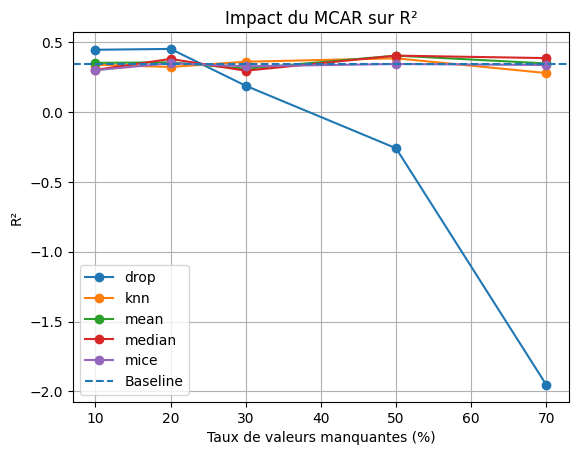

In [ ]:
plt.figure()
for method in df["method"].unique():
    sub = df[(df["mechanism"] == "MCAR") & (df["method"] == method)]
    plt.plot(sub["rate"], sub["R2"], marker="o", label=method)

if len(baseline) > 0:
    plt.axhline(baseline["R2"].values[0], linestyle="--", label="Baseline")

plt.xlabel("Taux de valeurs manquantes (%)")
plt.ylabel("R²")
plt.title("Impact du MCAR sur R²")
plt.legend()
plt.grid(True)
plt.show()


## Impact du taux de missing sur R² (MAR)

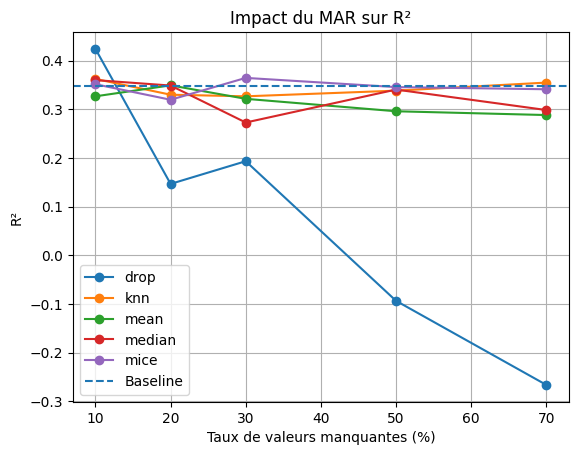

In [ ]:
plt.figure()
for method in df["method"].unique():
    sub = df[(df["mechanism"] == "MAR") & (df["method"] == method)]
    plt.plot(sub["rate"], sub["R2"], marker="o", label=method)

if len(baseline) > 0:
    plt.axhline(baseline["R2"].values[0], linestyle="--", label="Baseline")

plt.xlabel("Taux de valeurs manquantes (%)")
plt.ylabel("R²")
plt.title("Impact du MAR sur R²")
plt.legend()
plt.grid(True)
plt.show()


## Impact du taux de missing sur R² (MNAR)

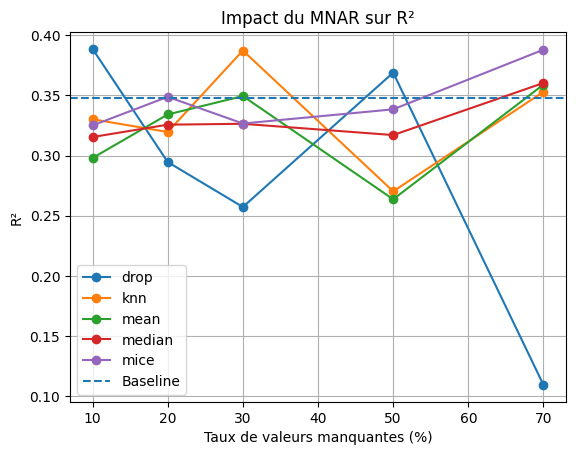

In [ ]:
plt.figure()
for method in df["method"].unique():
    sub = df[(df["mechanism"] == "MNAR") & (df["method"] == method)]
    plt.plot(sub["rate"], sub["R2"], marker="o", label=method)

if len(baseline) > 0:
    plt.axhline(baseline["R2"].values[0], linestyle="--", label="Baseline")

plt.xlabel("Taux de valeurs manquantes (%)")
plt.ylabel("R²")
plt.title("Impact du MNAR sur R²")
plt.legend()
plt.grid(True)
plt.show()


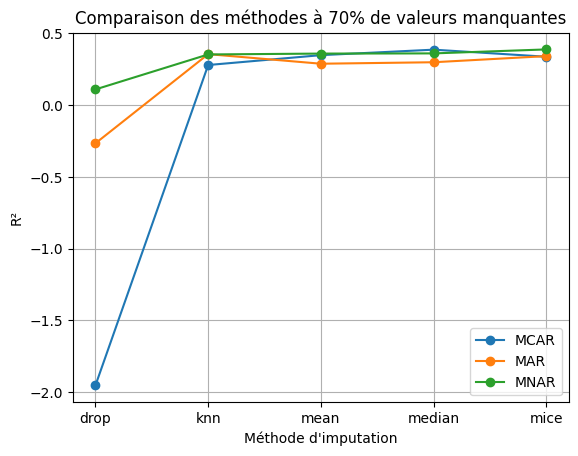

In [ ]:
df_70 = df[df["rate"] == 70]

plt.figure()
for mech in ["MCAR", "MAR", "MNAR"]:
    sub = df_70[df_70["mechanism"] == mech]
    plt.plot(sub["method"], sub["R2"], marker="o", label=mech)

plt.xlabel("Méthode d'imputation")
plt.ylabel("R²")
plt.title("Comparaison des méthodes à 70% de valeurs manquantes")
plt.legend()
plt.grid(True)
plt.show()
